In [ ]:
@Done
# Added viz plotting functions
# Correct arrow directions
# Applied Unix layout

# Material prepping

In [1]:
import pythoscent as pst
from graphviz import Graph, Digraph

Populating the interactive namespace from numpy and matplotlib
Tokenized corpus: MmCorpus(73898 documents, 29597 features, 6418219 non-zero entries)
Dictionary(29597 unique tokens: [u'fawn', u'schlegel', u'sonja', u'woods', u'spiders']...) 

Lemmatized corpus: MmCorpus(59245 documents, 26640 features, 5275674 non-zero entries)
Dictionary(26640 unique tokens: [u'adjust/VB', u'meteor/NN', u'certificate/NN', u'alcatraz/NN', u'removal/NN']...)


In [ ]:
pst.file2ia('../resources/gui_5')

In [2]:
gui = {'car': {'air conditioning': {'continuous': 'continuous',
   'pulse': 'pulse',
   'ventilation settings': 'ventilation settings'},
  'driving assistance': {'anti theft protection': {'choose notification recipient': 'choose notification recipient',
    'distant vehicle shut down': 'distant vehicle shut down',
    'tracking': 'tracking'},
   'cruise control': {'activate': 'activate', 'turn off': 'turn off'},
   'gps': {'check current coordinates': 'check current coordinates',
    'enter destination': 'enter destination',
    'recent destination': 'recent destination',
    'save destination address book': 'save destination address book'},
   'lane change alert': {'vibrate pedal': 'vibrate pedal',
    'vibrate rear view mirrors': 'vibrate rear view mirrors',
    'vibrate steering wheel': 'vibrate steering wheel'}},
  'filter settings': {'charcoal mode': 'charcoal mode',
   'pollen mode': 'pollen mode',
   'recycle interior air': 'recycle interior air'},
  'temperature settings': {'colder': 'colder',
   'display current temperature': 'display current temperature',
   'hotter': 'hotter'}},
 'entertainment': {'gaming': {'chess': 'chess',
   'online apps': 'online apps',
   'poker': 'poker'},
  'radio': {'classic': 'classic', 'electronic': 'electronic', 'pop': 'pop'},
  'television': {'documentaries': 'documentaries',
   'sort movies': {'genre': 'genre',
    'rating': 'rating',
    'release date': 'release date'},
   'tv series': 'tv series'}},
 'phone': {'contact lists': {'emergency': 'emergency',
   'family': 'family',
   'work': 'work'},
  'dial': 'dial',
  'pay bills': 'pay bills',
  'voice mail': {'change greetings': 'change greetings',
   'erase last message': 'erase last message',
   'listen messages': 'listen messages'}}}

In [ ]:
pst.ia2test_set(gui)

In [3]:
# add them comas after each line yo
test_set_gui = [
('chess', 'invite friend play chess', 'basic', 3),
('enter destination', 'get itinerary hospital', 'advanced', 4),
('genre', 'rent horror movie', 'advanced', 4),
('classic', 'turn off classical music', 'basic', 3)    
]

# Model comparison

In [ ]:
scent_data = pst.test2df (gui, test_set_gui)
scent_data.head(6)

In [ ]:
pst.plots(scent_data)

In [ ]:
pst.goal_matrix(test_set_gui)

# Adding graphviz output for step visualization

In [4]:
tok_w2v = pst.tok_w2v
lem_w2v = pst.lem_w2v
tok_lsi = pst.tok_lsi
tok_lda = pst.tok_lda
lem_lsi = pst.lem_lsi
lem_lda = pst.lem_lda

Assign output to variable. 
 var["model_choice"][goal number] 
 Model choices: w2_t, w2_l, ls_t, ls_l, ld_t, ld_l. 


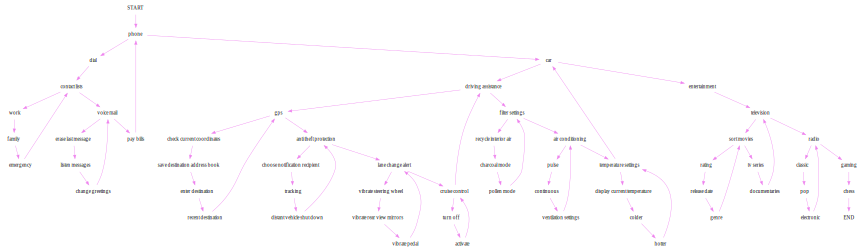

In [10]:
def sniffer_wrapper (gui, model, goal, target_feat, model_type):    
    
    def sniffer_logfile(gui, model, goal, target_feat, model_type, global_count = 0, seq=[]):
        state = pst.sim_sort(gui, model, goal, model_type)
        found_goal = False

        for label, score in state:
            #print '"%s", %s, ' %(label, round(score, 2))
            seq.append(label)    #seq is the sequence of steps navigated by sniffer
            global_count += 1

            if type(gui[label]) is dict:
                found_goal, g_cnt, seq = sniffer_logfile(gui[label], model, goal, target_feat, model_type)
                global_count += g_cnt

                if found_goal:
                    return True, global_count, seq
                seq.append(label)

            elif gui[label] == target_feat:
                return True, global_count, seq

        return False, global_count, seq   
    
    return sniffer_logfile(gui, model, goal, target_feat, model_type)

#sniffer_wrapper(gui, tok_w2v,'invite friend play chess', 'chess', 'w2v')

def graphviz_wrapper (gui, model, goal, t_feat, mod_type):    

    # Instantiating graphviz object
    dig = Digraph('unix', filename='unix.gv')
    dig.body.append('size="12"')
    dig.node_attr.update(color='white', style='filled')

    
    # Specifying nodes and edges from sniffer seq(uence) output
    def nodes_edges (gui, model, goal, t_feat, mod_type):
        log = []
        result = []
        result = sniffer_wrapper (gui, model, goal, t_feat, mod_type)
        log = result[2]
        log.insert(0, 'START')
        log.append('END')

        decallage = log[1:]
        logfile = zip(log, decallage)
        for line in logfile:
            #print ( 'dig.edge("%s", "%s")' % (line[0], line[1]))
            if model == tok_w2v:
                dig.edge(line[0], line[1], color="green")
            elif model == lem_w2v:
                dig.edge(line[0], line[1], color="blue")
            elif model == tok_lsi:
                dig.edge(line[0], line[1], color="pink")
            elif model == lem_lsi:
                dig.edge(line[0], line[1], color="violet")
    
    nodes_edges (gui, model, goal, t_feat, mod_type)
    return dig             

#graphviz_wrapper(gui, tok_w2v,'invite friend play chess', 'chess', 'w2v')

def taskBYmodel_viz(gui, test_set):
    som = dict()
    w2_t =[]
    w2_l =[]
    ls_t =[]
    ld_t =[]
    ls_l =[]
    ld_l =[]
    for t_feat, goal, bla, blah in test_set:
        w2_t.append (graphviz_wrapper(gui, tok_w2v, goal, t_feat, 'w2v'))
        w2_l.append (graphviz_wrapper(gui, lem_w2v, goal, t_feat, 'w2v_lem'))
        ls_t.append (graphviz_wrapper(gui, tok_lsi, goal, t_feat, 'latent'))
        ld_t.append (graphviz_wrapper(gui, tok_lda, goal, t_feat, 'latent'))
        ls_l.append (graphviz_wrapper(gui, lem_lsi, goal, t_feat, 'latent_lem'))
        ld_l.append (graphviz_wrapper(gui, lem_lda, goal, t_feat, 'latent_lem'))
    som['w2_t'] = w2_t
    som['w2_l'] = w2_l
    som['ls_t'] = ls_t
    som['ld_t'] = ld_t
    som['ls_l'] = ls_l
    som['ld_l'] = ld_l
    
    print 'Assign output to variable. \n var["model_choice"][goal number] \n Model choices: w2_t, w2_l, ls_t, ls_l, ld_t, ld_l. '
    return som
        #print a, 'n'

# Checking
essai = taskBYmodel_viz(gui, test_set_gui)
essai ['ls_l'][0]

Pinkishes are LSA, Blueishes are w2v, lemmatized is brighter


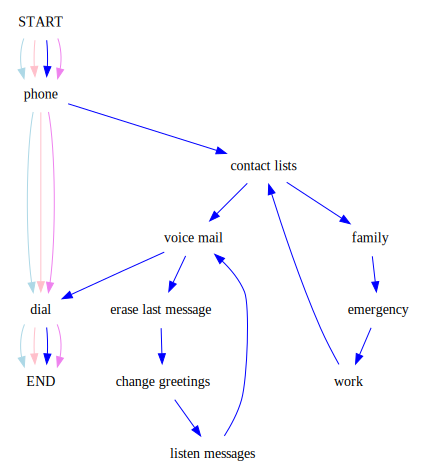

In [11]:
def modelsBYtask_viz (gui, goal, t_feat):    

    # Instantiating graphviz object
    dig = Digraph('unix', filename='unix.gv')
    dig.body.append('size="12"')
    dig.node_attr.update(color='white', style='filled')

    
    # Specifying nodes and edges from sniffer seq(uence) output
    def nodes_edges (gui, goal, t_feat):
        log = []
        result = []
        models = [(tok_w2v, 'w2v'),(tok_lsi,'latent'),(tok_lda, 'latent'),(lem_w2v, 'w2v_lem'), 
                  (lem_lsi, 'latent_lem'), (lem_lda, 'latent_lem')]
        for model, mod_type in models: 
        
            result = sniffer_wrapper (gui, model, goal, t_feat, mod_type)
            log = result[2]
            log.insert(0, 'START')
            log.append('END')

            decallage = log[1:]
            logfile = zip(log, decallage)
            for line in logfile:
                #print ( 'dig.edge("%s", "%s")' % (line[0], line[1]))
                if model == tok_w2v:
                    dig.edge(line[0], line[1], color="lightblue")
                elif model == lem_w2v:
                    dig.edge(line[0], line[1], color="blue")
                elif model == tok_lsi:
                    dig.edge(line[0], line[1], color="pink")
                elif model == lem_lsi:
                    dig.edge(line[0], line[1], color="violet")
                #print dig
    
    print 'Pinkishes are LSA, Blueishes are w2v, lemmatized is brighter'
    nodes_edges (gui, goal, t_feat)
    return dig             

modelsBYtask_viz(gui,'call parents', 'dial')

Pinkishes are LSA, Blueishes are w2v, lemmatized is brighter
Pinkishes are LSA, Blueishes are w2v, lemmatized is brighter
Pinkishes are LSA, Blueishes are w2v, lemmatized is brighter
Pinkishes are LSA, Blueishes are w2v, lemmatized is brighter


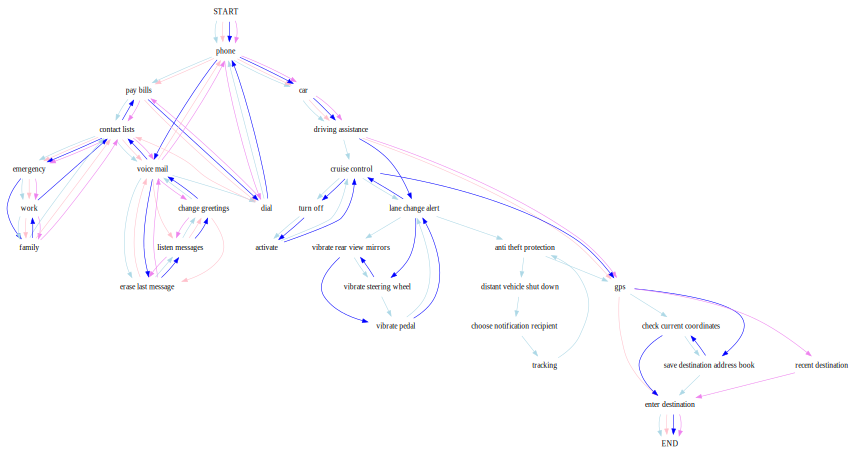

In [17]:
def modelsBYset_viz (gui, test_set):
    my_dig = None
    dig_list = []
    for t_feat, goal, c, d in test_set:
        dig_list.append  (modelsBYtask_viz(gui, goal, t_feat))
    return dig_list 

# Checking
d = modelsBYset_viz(gui, test_set_gui)
d[1]

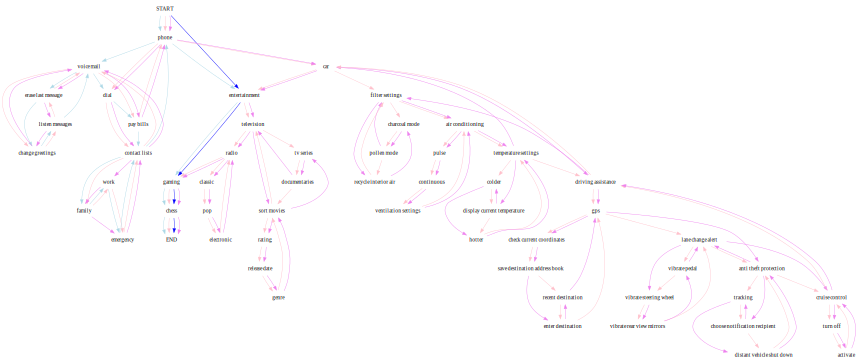

In [18]:
d[0]